In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize

In [2]:
student_df = pd.read_csv("StudentsPerformance.csv")
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
student_df["math score"] = student_df["math score"].replace(0, 1)
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


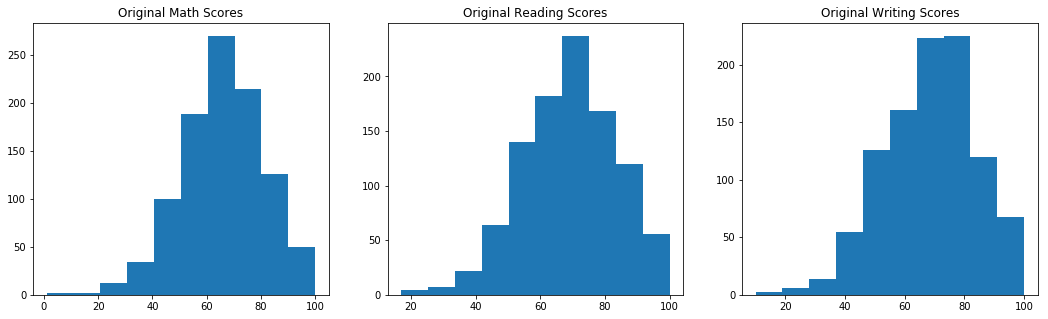

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(student_df["math score"])
plt.title("Original Math Scores")

plt.subplot(1,3,2)
plt.hist(student_df["reading score"])
plt.title("Original Reading Scores")

plt.subplot(1,3,3)
plt.hist(student_df["writing score"])
plt.title("Original Writing Scores")

plt.show()


The distributions look close to normal, but they are slightly left skewed. I will go ahead and Box Cox them and see if there is a change.

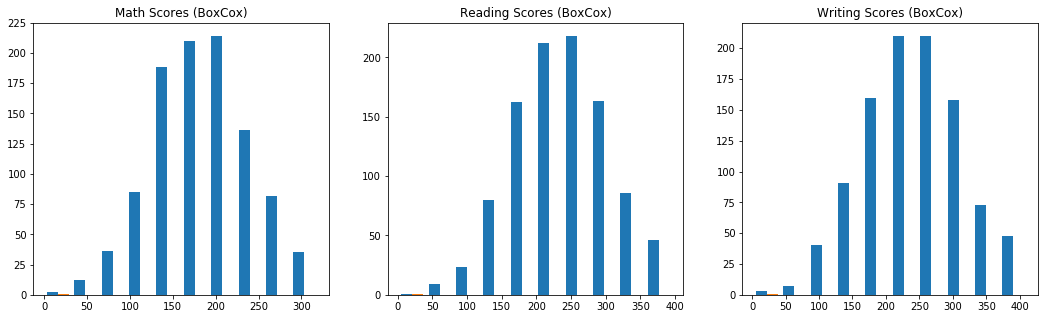

In [5]:
from scipy.stats import boxcox

math_scores_boxcox = boxcox(student_df["math score"])
reading_scores_boxcox = boxcox(student_df["reading score"])
writing_scores_boxcox = boxcox(student_df["writing score"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(math_scores_boxcox)
plt.title("Math Scores (BoxCox)")

plt.subplot(1,3,2)
plt.hist(reading_scores_boxcox)
plt.title("Reading Scores (BoxCox)")

plt.subplot(1,3,3)
plt.hist(writing_scores_boxcox)
plt.title("Writing Scores (BoxCox)")

plt.show()

The scores appear normalized after running the boxcox function. They are not perfect though, so now I will scale the values and determine if that normalizes the data.

C:\Users\jimst\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jimst\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jimst\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


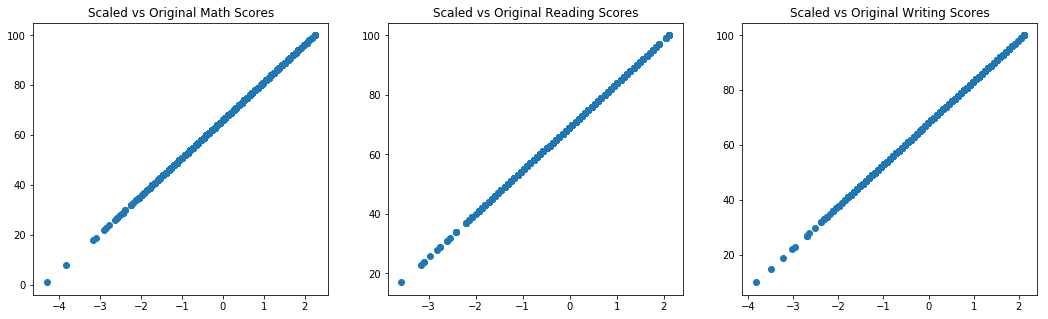

In [6]:
from sklearn.preprocessing import scale

student_df["scaled_boxcox_math"] = scale(student_df["math score"])
student_df["scaled_boxcox_reading"] = scale(student_df["reading score"])
student_df["scaled_boxcox_writing"] = scale(student_df["writing score"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["scaled_boxcox_math"], student_df["math score"])
plt.title("Scaled vs Original Math Scores")

plt.subplot(1,3,2)
plt.scatter(student_df["scaled_boxcox_reading"], student_df["reading score"])
plt.title("Scaled vs Original Reading Scores")

plt.subplot(1,3,3)
plt.scatter(student_df["scaled_boxcox_writing"], student_df["writing score"])
plt.title("Scaled vs Original Writing Scores")
plt.show()

In [7]:
#Created a new variable calculating the average of the three scores for each student.
score_average = (student_df["math score"] + student_df["reading score"] + student_df["writing score"])/3
student_df = pd.concat([student_df, score_average], axis=1)
student_df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,scaled_boxcox_math,scaled_boxcox_reading,scaled_boxcox_writing,0
0,female,group B,bachelor's degree,standard,none,72,72,74,0.390069,0.193999,0.391492,72.666667
1,female,group C,some college,standard,completed,69,90,88,0.192064,1.427476,1.313269,82.333333
2,female,group B,master's degree,standard,none,90,95,93,1.578096,1.770109,1.642475,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.259969,-0.833899,-1.583744,49.333333
4,male,group C,some college,standard,none,76,78,75,0.654075,0.605158,0.457333,76.333333


In [15]:
#Renamed the column so that it represented the information in the column.
student_df = student_df.rename(columns = {0:'score_average'})
student_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'scaled_boxcox_math', 'scaled_boxcox_reading',
       'scaled_boxcox_writing', 'score_average'],
      dtype='object')

In [17]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,scaled_boxcox_math,scaled_boxcox_reading,scaled_boxcox_writing,score_average
0,female,group B,bachelor's degree,standard,none,72,72,74,0.390069,0.193999,0.391492,72.666667
1,female,group C,some college,standard,completed,69,90,88,0.192064,1.427476,1.313269,82.333333
2,female,group B,master's degree,standard,none,90,95,93,1.578096,1.770109,1.642475,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.259969,-0.833899,-1.583744,49.333333
4,male,group C,some college,standard,none,76,78,75,0.654075,0.605158,0.457333,76.333333


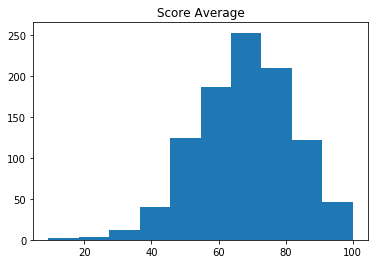

In [18]:
#Plotted the new column in a histogram for a visual, checking for "normal" distribution.
plt.hist(student_df['score_average'])
plt.title("Score Average")
plt.show()

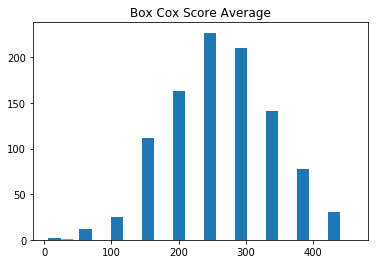

In [19]:
#Box Coxed the score average to see if that created a normailized distribution.
box_cox_score_ave = boxcox(student_df['score_average'])
plt.hist(box_cox_score_ave)
plt.title("Box Cox Score Average")
plt.show()

The box cox version of the average scores seems to be close to normally distributed. The original average scores was skewed slightly left.

In [20]:
student_df = pd.concat([student_df, pd.get_dummies(student_df["test preparation course"])], axis=1)
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,scaled_boxcox_math,scaled_boxcox_reading,scaled_boxcox_writing,score_average,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,0.390069,0.193999,0.391492,72.666667,0,1
1,female,group C,some college,standard,completed,69,90,88,0.192064,1.427476,1.313269,82.333333,1,0
2,female,group B,master's degree,standard,none,90,95,93,1.578096,1.770109,1.642475,92.666667,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.259969,-0.833899,-1.583744,49.333333,0,1
4,male,group C,some college,standard,none,76,78,75,0.654075,0.605158,0.457333,76.333333,0,1


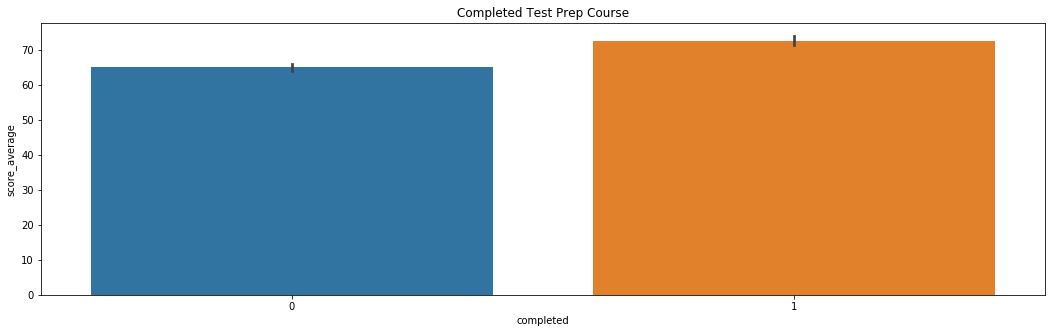

In [24]:
plt.figure(figsize=(18,5))

sns.barplot(student_df['completed'], student_df['score_average'])
plt.title("Completed Test Prep Course")

plt.show()

Comparing the completing the test prep course to the students that did not complete the course. You can see that the average score is higher for the students that did complete it. Their appears to be a correlation between taking the course and scoring well on the tests. 